In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [3]:
# Listing 5.1 Instantiating a small convnet

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


2023-10-23 20:27:12.961181: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-10-23 20:27:12.964113: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 20:27:12.969457: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Listing 5.2 Adding a classifier on top of the convnet

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [7]:
# Listing 5.3 Training the convnet on MNIST images

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


2023-10-23 20:27:26.951379: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-10-23 20:27:26.953180: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1881595000 Hz


Epoch 1/5
938/938 [==============================] - 47s 48ms/step - loss: 0.4093 - accuracy: 0.8709
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0492 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0331 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0172 - accuracy: 0.9943


In [8]:
# evaluate() : 在前一章某個程式段落執行會有問，以錯誤訊息來看，應該是這個函數已不建議使用…
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("loss= ", test_loss, "acc= ", test_acc)


313/313 [==============================] - 5s 13ms/step - loss: 0.0263 - accuracy: 0.9922
loss=  0.026346465572714806 acc=  0.9922000169754028


In [9]:
# FOR TEST os
#os.path
#print(os.path.isdir(original_dataset_dir))
#print(original_dataset_dir)

#--- FOR Linux Settings ---#
original_dataset_dir = '/home/earvin/workspaces/datasets/kaggle_original_data'
base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'

#--- FOR Widows(vivopc) Settings ---#
#original_dataset_dir = 'E:\WORKSPACES\Datasets\kaggle_original_data'
#base_dir = 'E:\WORKSPACES\Datasets\cats_and_dogs_small'

fnames = ['{}.jpg'.format(i) for i in range(10)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    print(src, dst)
    shutil.copyfile(src, dst)




NameError: name 'original_dataset_dir' is not defined

In [11]:
# Listing 5.4 Copying images to training, validation, and test directories (1) 
# NOTE : 要依執行平台修正相對應的路徑

import os, shutil

#--- FOR Linux Settings ---#
original_dataset_dir = '/home/earvin/workspaces/datasets/kaggle_original_data'
base_dir = '/home/earvin/workspaces/datasets/cats_and_dogs_small'

#--- FOR Widows(vivopc) Settings ---#
#original_dataset_dir = 'E:\WORKSPACES\Datasets\kaggle_original_data'
#base_dir = 'E:\WORKSPACES\Datasets\cats_and_dogs_small'

if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
    # 分別對應劃分後的訓練、驗證和測試的目錄
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

    # 貓、狗的訓練圖像目錄
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)

    # 貓、狗的驗證圖像目錄
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)

    # 貓、狗的測試圖像目錄
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)


In [12]:
# § Listing 5.4 Copying images to training, validation, and test directories (2)

# Cats
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Dogs
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [13]:
# check copy status

print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))


total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [16]:
# Listing 5.5 Instantiating a small convnet for dogs vs. cats classification

from keras import layers
from keras import models

model = models.Sequential()
# param = (3 * 3 * 3 + 1) * 32 = 896
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# param = (32 * 3 * 3 + 1) * 64 = 18496
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# param = (64 * 3 * 3 + 1) * 128 = 73856
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# param = (128 * 3 * 3 + 1) * 128 = 147584
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
# ??
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [17]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [18]:
# Listing 5.6 Configuring the model for training

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [19]:
# § Listing 5.7 Using ImageDataGenerator to read images from directories

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
#=== FOR TEST ===#
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [21]:
# Listing 5.8 Fitting the model using a batch generator

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


/home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 76s 722ms/step - loss: 0.6992 - acc: 0.4987 - val_loss: 0.6734 - val_acc: 0.5480
Epoch 2/30
100/100 [==============================] - 69s 691ms/step - loss: 0.6663 - acc: 0.5905 - val_loss: 0.6687 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 69s 693ms/step - loss: 0.6289 - acc: 0.6630 - val_loss: 0.6345 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 68s 678ms/step - loss: 0.5879 - acc: 0.6821 - val_loss: 0.5922 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 69s 694ms/step - loss: 0.5610 - acc: 0.7158 - val_loss: 0.5961 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 69s 690ms/step - loss: 0.5133 - acc: 0.7488 - val_loss: 0.5805 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 69s 690ms/step - loss: 0.4767 - acc: 0.7713 - val_loss: 0.5810 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 6

In [22]:
# Listing 5.9 Saving the model

model.save('cats_and_dogs_small_1.h5')


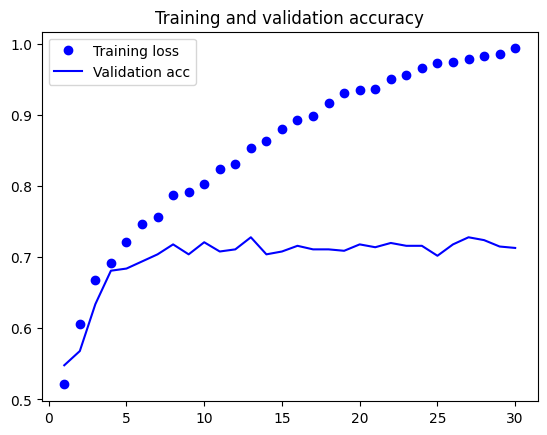

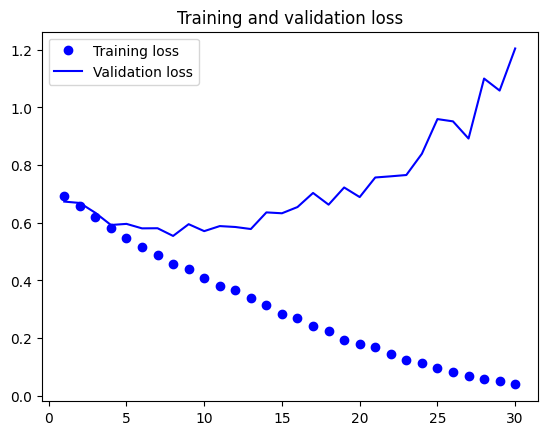

In [23]:
# Listing 5.10 Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
#=== CH05的後半段，再找時機做 ===#
